<a href="https://colab.research.google.com/github/kahakashanashraf/machine-learning/blob/main/aiproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/CC GENERAL (1).csv')
data.head()

FileNotFoundError: ignored

In [ ]:
data = data.loc[:, ['BALANCE', 'PAYMENTS']]
data.head(2)

In [ ]:
X = data.values

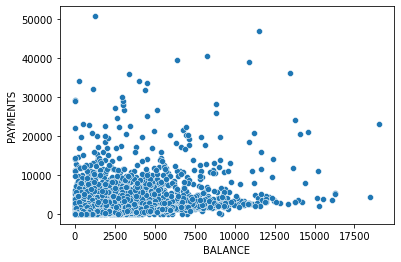

In [ ]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.show()

In [ ]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [ ]:
def kmeans(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = data.sample(n=k).values
  while diff:
     # for each observation
     for i, row in enumerate(X):
         mn_dist = float('inf')
        # dist of the point from all centroids
         for idx, centroid in enumerate(centroids):
            d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            # store closest centroid
            if mn_dist > d:
               mn_dist = d
               cluster[i] = idx
     new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     # if centroids are same then leave
     if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
     else:
        centroids = new_centroids
  return centroids, cluster

In [ ]:
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

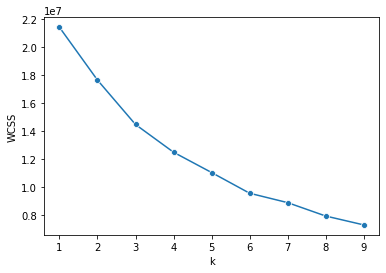

In [ ]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k = 4
centroids, cluster = kmeans(X, k)

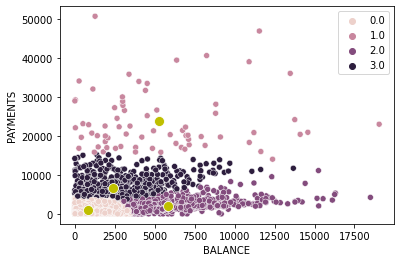

In [ ]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster )
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix


In [ ]:
#Import standardization functions from scikit-learn

from sklearn.preprocessing import StandardScaler

In [ ]:
#Standardize the data set

scaler = StandardScaler()
scaler.fit(data.drop('BALANCE', axis=1))

scaled_features = scaler.transform(data.drop('BALANCE', axis=1))

scaled_data = pd.DataFrame(scaled_features, columns = data.drop('BALANCE', axis=1).columns)

In [ ]:
#Split the data set into training data and test data

from sklearn.model_selection import train_test_split

x = scaled_data

y = data['BALANCE']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [ ]:
#Train the model and make predictions

from sklearn.neighbors import KNeighborsClassifier



In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)

model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

ValueError: ignored

In [ ]:
#Performance measurement

from sklearn.metrics import classification_report


print(classification_report(y_test_data, predictions))

NameError: ignored